Function to scrape article text

In [ ]:
def scrape_article_text(article_url):
    try:
        article_response = requests.get(article_url)
        if article_response.status_code == 200:
            # Parse the HTML content
            soup = BeautifulSoup(article_response.content, 'html.parser')

            # Try to find the main article text (this can vary between websites)
            # Common tags for article content: <p>, <div>, <article>
            paragraphs = soup.find_all('p')  # maybe change this on a site by site basis...

            # Extract and concatenate the text from the paragraphs
            article_text = ' '.join([para.get_text() for para in paragraphs])

            return article_text if article_text else "No text found"
        else:
            return f" {article_response.status_code}"

    except Exception as e:
        return f"{str(e)}"

Russia for Donald Trump

In [ ]:
import requests
import json

API_KEY = 'pub_5570367654230de0d58eb82aad31471101c90'

url = f'https://newsdata.io/api/1/news?apikey=pub_5570367654230de0d58eb82aad31471101c90&q=russia'

params = {
    'apikey': API_KEY,
    'q': '"Дональд Трамп" AND "Выборы"',
    'country': 'ru',  # country code for Russia
    'language': 'ru',  # Russian language for Russia
}

response = requests.get(url, params=params)


if response.status_code == 200:
    data_trump = response.json()

    #print(data)

    if 'results' in data_trump:
        articles_trump = data_trump['results']
        for i, article in enumerate(articles_trump, 1):
            print(f"Article {i}:")
            print(f"Title: {article.get('title')}")
            print(f"Description: {article.get('description')}")
            print(f"Published At: {article.get('pubDate')}")
            print(f"Source: {article.get('source_id')}")
            print(f"Link: {article.get('link')}")
            print("-" * 50)
    else:
        print("No articles found.")
else:
    print(f"Failed to fetch articles. Status code: {response.status_code}")


Article 1:
Title: Обвиняемому в ДТП, где погиб сын губернатора Бусаргина, запросили 6,5 года колонии
Description: Гособвинение запросило шесть лет и шесть месяцев в колонии общего режима Амиру Рахматулину, обвиняемому в ДТП, в котором погибли два человека, в том числе сын губернатора Саратовской области Романа Бусаргина. Читать далее
Published At: 2024-10-28 10:24:40
Source: rt_ru
Link: https://russian.rt.com/russia/news/1388440-dtp-syn-gubernator
--------------------------------------------------
Article 2:
Title: «Конфликт из-за девушки»: 23 человека задержаны в Сочи после массовой драки
Description: 23 человека задержали в Сочи по подозрению в участии в массовой драке. В отношении десяти из них возбуждены административные дела. По данным МВД, потасовка завязалась между местными жителями в возрасте от 18 до 20 лет из-за девушки. Во время драки пострадал 17-летний подросток. Читать далее
Published At: 2024-10-28 10:19:03
Source: rt_ru
Link: https://russian.rt.com/russia/article/13

Russia for Kamala Harris

In [ ]:
params = {
    'apikey': API_KEY,
    'q': '"Камала Харрис" AND "Выборы"',
    'country': 'Ru',  # country code for Russia
    'language': 'ru',  # Russian language for Russia
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data_harris = response.json()

    if 'results' in data_harris:
        articles_harris = data_harris['results']
        for i, article in enumerate(articles_harris, 1):
            print(f"Article {i}:")
            print(f"Title: {article.get('title')}")
            print(f"Description: {article.get('description')}")
            print(f"Published At: {article.get('pubDate')}")
            print(f"Source: {article.get('source_id')}")
            print(f"Link: {article.get('link')}")
            print("-" * 50)
    else:
        print("No articles found.")
else:
    print(f"Failed to fetch articles. Status code: {response.status_code}")

Article 1:
Title: Обвиняемому в ДТП, где погиб сын губернатора Бусаргина, запросили 6,5 года колонии
Description: Гособвинение запросило шесть лет и шесть месяцев в колонии общего режима Амиру Рахматулину, обвиняемому в ДТП, в котором погибли два человека, в том числе сын губернатора Саратовской области Романа Бусаргина. Читать далее
Published At: 2024-10-28 10:24:40
Source: rt_ru
Link: https://russian.rt.com/russia/news/1388440-dtp-syn-gubernator
--------------------------------------------------
Article 2:
Title: «Конфликт из-за девушки»: 23 человека задержаны в Сочи после массовой драки
Description: 23 человека задержали в Сочи по подозрению в участии в массовой драке. В отношении десяти из них возбуждены административные дела. По данным МВД, потасовка завязалась между местными жителями в возрасте от 18 до 20 лет из-за девушки. Во время драки пострадал 17-летний подросток. Читать далее
Published At: 2024-10-28 10:19:03
Source: rt_ru
Link: https://russian.rt.com/russia/article/13

Article text

In [ ]:
from bs4 import BeautifulSoup

harris_texts = []
trump_texts = []

for i, article in enumerate(articles_harris, 1):
    article_url = article.get('link')
    article_text = scrape_article_text(article_url)
    harris_texts.append(article_text)
    print(f"Article Text: {article_text}")

for i, article in enumerate(articles_trump, 1):
    article_url = article.get('link')
    article_text = scrape_article_text(article_url)
    trump_texts.append(article_text)
    print(f"Article Text: {article_text}")

Article Text: Об этом ТАСС сообщил адвокат обвиняемого Александр Бесараб. Авария произошла 22 июля. Lada Granta, за рулём которой был Рахматулин, столкнулась с припаркованным грузовиком MAN. В результате в легковом автомобиле погибли два человека и двое пострадали. Ранее сообщалось, что трое подростков погибли и один пострадал в результате столкновения квадроцикла и двух питбайков с автомобилем на трассе Нижнегорский — Белогорск в Крыму. © Автономная некоммерческая организация «ТВ-Новости», 2005—2024 гг. Все права защищены. Сетевое издание rt.com зарегистрировано Роскомнадзором 14 августа 2020 г., свидетельство Эл № ФС 77-78993 Главный редактор: Симоньян М. С. Адрес редакции: 111020, Москва, Боровая улица, 3к1. Телефон: +7 499 750-00-75 доб. 1200 E-mail: info@rttv.ru Политика АНО «ТВ-Новости» в отношении обработки персональных данных Организации, признанные экстремистскими и запрещённые на территории РФ Данный сайт использует файлы cookies
Article Text: В Сочи полицейские задержали 23 

In [ ]:
with open("harris_texts.txt", "w") as harris_file:
    for article_text in harris_texts:
        harris_file.write(article_text + "\n\n")

with open("trump_texts.txt", "w") as trump_file:
    for article_text in trump_texts:
        trump_file.write(article_text + "\n\n")

if replicating our results start here

In [7]:
!pip install wordcloud matplotlib

In [8]:
import matplotlib.pyplot as plt
import wordcloud

In [9]:
# Read the content of each file and store in respective variables
with open("russia_harris_texts.txt", "r") as file:
    harris_texts = file.read()

with open("russia_trump_texts.txt", "r") as file:
    trump_texts = file.read()

# Display first 500 characters of each variable as a check
print("Harris Texts Sample:")
print(harris_texts[:500])

print("\nTrump Texts Sample:")
print(trump_texts[:500])


Harris Texts Sample:

HTML-код вставки видео


Полузащитник «Локомотива» Алексей Батраков стал автором гола в матче 13‑го тура МИР РПЛ против «Зенита». Он сравнял счет на 68‑й минуте матча — 1:1. Автором голевой передачи стал Сергей Пиняев. Встреча проходит в Санкт‑Петербурге. Прямую трансляцию игры смотрите в эти минуты на телеканале «Матч ТВ», а также сайтах matchtv.ru и sportbox.ru.


HTML-код вставки видео



HTML-код вставки видео


Москва. 27 октября. INTERFAX.RU - ВСУ продолжают запуски беспилотников самолетн

Trump Texts Sample:

HTML-код вставки видео


Полузащитник «Локомотива» Алексей Батраков стал автором гола в матче 13‑го тура МИР РПЛ против «Зенита». Он сравнял счет на 68‑й минуте матча — 1:1. Автором голевой передачи стал Сергей Пиняев. Встреча проходит в Санкт‑Петербурге. Прямую трансляцию игры смотрите в эти минуты на телеканале «Матч ТВ», а также сайтах matchtv.ru и sportbox.ru.


HTML-код вставки видео



HTML-код вставки видео


Москва. 27 октября. INTERFAX.RU - ВС

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Get the stopwords for the specified language
    stop_words = set(stopwords.words("russian"))
    print(stop_words)

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


replicatong combined text

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

trump_comb_text = ""
for i in trump_texts:
  trump_comb_text += i

trump_comb_text = remove_stopwords(trump_comb_text)

harris_comb_text = ""
for i in harris_texts:
  harris_comb_text += i

harris_comb_text = remove_stopwords(harris_comb_text)

{'мы', 'его', 'для', 'свою', 'раз', 'есть', 'после', 'во', 'там', 'тебя', 'себя', 'ним', 'он', 'так', 'из', 'не', 'всего', 'про', 'три', 'всю', 'в', 'можно', 'над', 'лучше', 'а', 'вдруг', 'бы', 'ее', 'один', 'вот', 'о', 'куда', 'нее', 'они', 'когда', 'никогда', 'хоть', 'чем', 'будет', 'разве', 'до', 'такой', 'между', 'их', 'иногда', 'было', 'тоже', 'под', 'чуть', 'без', 'ему', 'теперь', 'где', 'уже', 'же', 'том', 'на', 'того', 'и', 'ничего', 'еще', 'этой', 'себе', 'от', 'ей', 'эти', 'ж', 'да', 'может', 'чтобы', 'была', 'сам', 'мне', 'ты', 'какой', 'ведь', 'наконец', 'ну', 'тогда', 'более', 'мой', 'нас', 'больше', 'будто', 'этого', 'у', 'все', 'какая', 'него', 'потому', 'вас', 'или', 'надо', 'ни', 'через', 'моя', 'как', 'эту', 'быть', 'ней', 'здесь', 'только', 'впрочем', 'чего', 'нет', 'конечно', 'потом', 'об', 'уж', 'за', 'но', 'хорошо', 'почти', 'всех', 'к', 'то', 'я', 'что', 'им', 'другой', 'опять', 'по', 'она', 'меня', 'этом', 'этот', 'вам', 'тем', 'них', 'нибудь', 'зачем', 'был', '

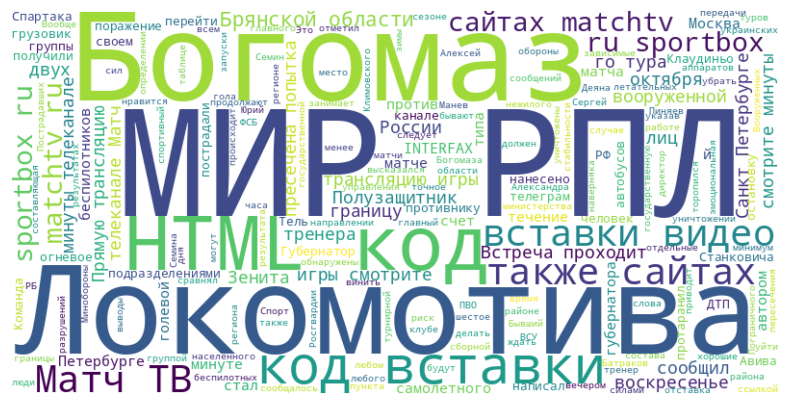

--------------------------------------------------


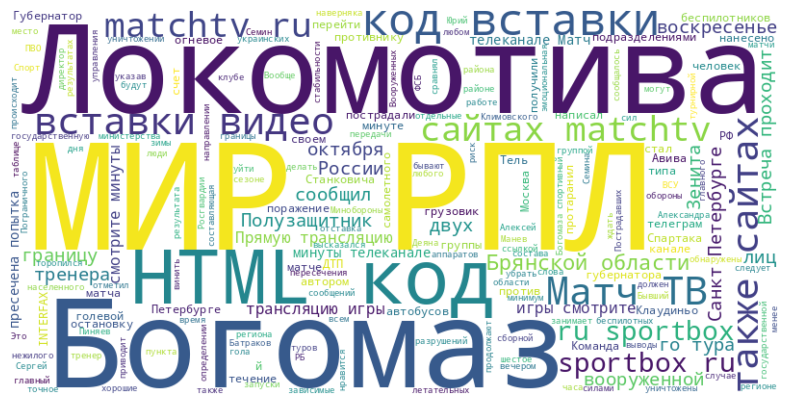

--------------------------------------------------
Word: МИР РПЛ, Frequency: 1.0
Word: Локомотива, Frequency: 0.6666666666666666
Word: Богомаз, Frequency: 0.6666666666666666
Word: HTML код, Frequency: 0.6666666666666666
Word: код вставки, Frequency: 0.6666666666666666
Word: вставки видео, Frequency: 0.6666666666666666
Word: Матч ТВ, Frequency: 0.6666666666666666
Word: также сайтах, Frequency: 0.6666666666666666
Word: сайтах matchtv, Frequency: 0.6666666666666666
Word: matchtv ru, Frequency: 0.6666666666666666
Word: ru sportbox, Frequency: 0.6666666666666666
Word: sportbox ru, Frequency: 0.6666666666666666
Word: Брянской области, Frequency: 0.6666666666666666
Word: Полузащитник, Frequency: 0.5
Word: Зенита, Frequency: 0.5
Word: октября, Frequency: 0.5
Word: воскресенье, Frequency: 0.5
Word: сообщил, Frequency: 0.5
Word: вооруженной, Frequency: 0.5
Word: лиц, Frequency: 0.5
Word: границу, Frequency: 0.5
Word: России, Frequency: 0.5
Word: тренера, Frequency: 0.5
Word: двух, Frequency: 0.5

In [13]:
wordcloud_trump = WordCloud(width=800, height=400, background_color='white').generate(trump_comb_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))  # Set figure size for better display
plt.imshow(wordcloud_trump, interpolation='bilinear')  # Display the generated image
plt.axis('off')  # Turn off axis lines and labels
plt.show()  # Show the plot

print("-" * 50)

wordcloud_harris = WordCloud(width=800, height=400, background_color='white').generate(harris_comb_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))  # Set figure size for better display
plt.imshow(wordcloud_harris, interpolation='bilinear')  # Display the generated image
plt.axis('off')  # Turn off axis lines and labels
plt.show()  # Show the plot

print("-" * 50)

words_frequencies_trump = wordcloud_trump.words_
for word, freq in words_frequencies_trump.items():
    print(f"Word: {word}, Frequency: {freq}")

print("-" * 50)

words_frequencies_harris = wordcloud_harris.words_
for word, freq in words_frequencies_harris.items():
    print(f"Word: {word}, Frequency: {freq}")

In [14]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00


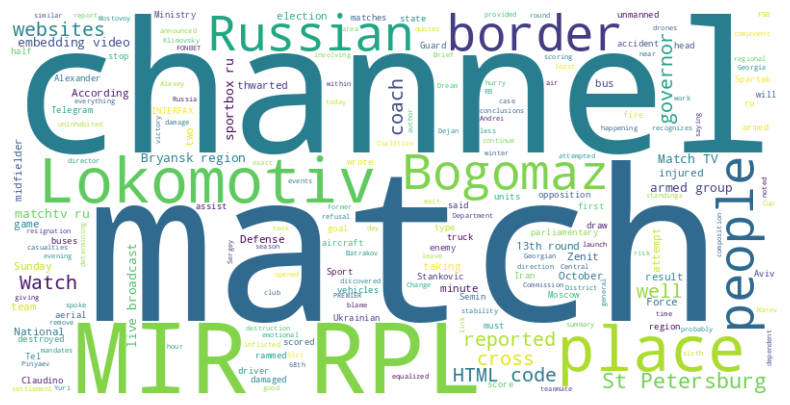

--------------------------------------------------


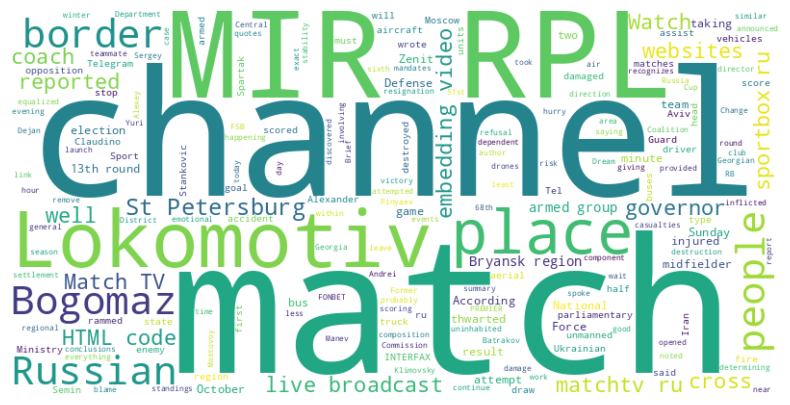

--------------------------------------------------
Word: match, Frequency: 1.0
Word: channel, Frequency: 0.8571428571428571
Word: MIR RPL, Frequency: 0.8571428571428571
Word: Lokomotiv, Frequency: 0.7142857142857143
Word: place, Frequency: 0.7142857142857143
Word: Bogomaz, Frequency: 0.7142857142857143
Word: Russian, Frequency: 0.7142857142857143
Word: people, Frequency: 0.7142857142857143
Word: border, Frequency: 0.7142857142857143
Word: St Petersburg, Frequency: 0.7142857142857143
Word: Watch, Frequency: 0.5714285714285714
Word: well, Frequency: 0.5714285714285714
Word: websites, Frequency: 0.5714285714285714
Word: governor, Frequency: 0.5714285714285714
Word: reported, Frequency: 0.5714285714285714
Word: cross, Frequency: 0.5714285714285714
Word: coach, Frequency: 0.5714285714285714
Word: HTML code, Frequency: 0.5714285714285714
Word: embedding video, Frequency: 0.5714285714285714
Word: live broadcast, Frequency: 0.5714285714285714
Word: Match TV, Frequency: 0.5714285714285714
Word:

In [15]:
from deep_translator import GoogleTranslator

# Function to split the text into smaller chunks
def split_text(text, max_length):
    words = text.split(' ')
    chunks = []
    current_chunk = []

    for word in words:
        if len(' '.join(current_chunk + [word])) <= max_length:
            current_chunk.append(word)
        else:
            chunks.append(' '.join(current_chunk))
            current_chunk = [word]
    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks

# Reduce max_chars_per_chunk to avoid exceeding the limit
max_chars_per_chunk = 2000  # Adjusted to a safer limit
harris_chunks = split_text(harris_comb_text, max_chars_per_chunk)
trump_chunks = split_text(trump_comb_text, max_chars_per_chunk)

# Translate each chunk with error handling
translator = GoogleTranslator(source='auto', target='en')

def translate_chunks(chunks):
    translated_chunks = []
    for chunk in chunks:
        try:
            translated_chunk = translator.translate(chunk)
            translated_chunks.append(translated_chunk)
        except Exception as e:
            print(f"Translation error: {e}")
            translated_chunks.append("")  # Add empty string if translation fails
    return translated_chunks

translated_harris_chunks = translate_chunks(harris_chunks)
english_harris = ' '.join(translated_harris_chunks)

translated_trump_chunks = translate_chunks(trump_chunks)
english_trump = ' '.join(translated_trump_chunks)

# Generate and display the word clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_trump = WordCloud(width=800, height=400, background_color='white').generate(english_trump)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_trump, interpolation='bilinear')
plt.axis('off')
plt.show()

print("-" * 50)

wordcloud_harris = WordCloud(width=800, height=400, background_color='white').generate(english_harris)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_harris, interpolation='bilinear')
plt.axis('off')
plt.show()

# Display word frequencies
print("-" * 50)
words_frequencies_trump = wordcloud_trump.words_
for word, freq in words_frequencies_trump.items():
    print(f"Word: {word}, Frequency: {freq}")

print("-" * 50)
words_frequencies_harris = wordcloud_harris.words_
for word, freq in words_frequencies_harris.items():
    print(f"Word: {word}, Frequency: {freq}")